In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import torch.nn.functional as F

import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
mnist_train = dsets.MNIST(root='./data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='./data/', train=False, transform=transforms.ToTensor(), download=True)

Processing...
Done!


In [42]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512, bias=True)
        self.fc2 = nn.Linear(512, 10, bias=True)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [43]:
num_epochs = 5
batch_size = 100

data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, num_workers=1)

In [44]:
model = NeuralNet()

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(data_loader):
        X = batch_images.view(-1, 28 * 28)
        Y = batch_labels
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
            
print("Learning finished!")

Epoch [1/5], lter [100/600], Loss: 2.2702
Epoch [1/5], lter [200/600], Loss: 2.2427
Epoch [1/5], lter [300/600], Loss: 2.2283
Epoch [1/5], lter [400/600], Loss: 2.2004
Epoch [1/5], lter [500/600], Loss: 2.1947
Epoch [1/5], lter [600/600], Loss: 2.1639
Epoch [2/5], lter [100/600], Loss: 2.1324
Epoch [2/5], lter [200/600], Loss: 2.1001
Epoch [2/5], lter [300/600], Loss: 2.1045
Epoch [2/5], lter [400/600], Loss: 2.0775
Epoch [2/5], lter [500/600], Loss: 2.0220
Epoch [2/5], lter [600/600], Loss: 1.9850
Epoch [3/5], lter [100/600], Loss: 1.9284
Epoch [3/5], lter [200/600], Loss: 1.9096
Epoch [3/5], lter [300/600], Loss: 1.8976
Epoch [3/5], lter [400/600], Loss: 1.8919
Epoch [3/5], lter [500/600], Loss: 1.8611
Epoch [3/5], lter [600/600], Loss: 1.8084
Epoch [4/5], lter [100/600], Loss: 1.8096
Epoch [4/5], lter [200/600], Loss: 1.7557
Epoch [4/5], lter [300/600], Loss: 1.6989
Epoch [4/5], lter [400/600], Loss: 1.6593
Epoch [4/5], lter [500/600], Loss: 1.6417
Epoch [4/5], lter [600/600], Loss:

In [45]:
correct = 0
total = 0

for images, labels in mnist_test:
    images = images.view(-1, 28 * 28)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy: %f %%' % (100 * float(correct) / total))

Accuracy: 78.350000 %


In [46]:
random_number = random.randint(0, len(mnist_test) - 1)
random_X = mnist_test.test_data[random_number:random_number + 1].view(-1, 28 * 28).float()
random_Y = mnist_test.test_labels[random_number:random_number+1]

Random Y:  [2]
Predicted Y:  [2]


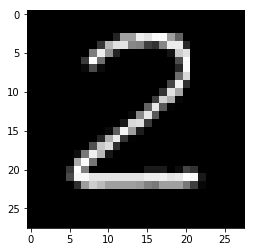

In [47]:
random_pre = model(random_X)
plt.imshow(random_X.data.view(28, 28).numpy(), cmap='gray')
print('Random Y: ', random_Y.data.view(1).numpy())
print('Predicted Y: ', torch.max(random_pre.data, 1)[1].numpy())